In [2]:
# import utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

# need this to display plots in jupyter notebook
%matplotlib notebook

In [17]:
# create some arbitrary data
t = np.linspace(0, 20, 100)
x = np.sin(np.pi/5 * t)
y = np.cos(np.pi/7 * t)
z = np.linspace(0, 100, 100)

# construct array for test data
dataSet = np.array([x, y, z])
n_points = len(t)

In [18]:
# this is the function used in the FuncAnimation function
def animate_func(num):
    
    # clear current figure
    ax.clear()     
    
    # update the data for the line, use num+1 bc Python indexing
    ax.plot3D(dataSet[0, :num+1], dataSet[1, :num+1], dataSet[2, :num+1], c='blue')
    
    # add a point for the current particle point
    ax.scatter(dataSet[0, num], dataSet[1, num], dataSet[2, num], c='blue', marker='o')
    
    # add a point for the particle start point
    ax.plot3D(dataSet[0, 0], dataSet[1, 0], dataSet[2, 0], c='black', marker='o')    # Setting Axes Limits
    ax.set_xlim3d([-1, 1])
    ax.set_ylim3d([-1, 1])
    ax.set_zlim3d([0, 100])

    # Adding Figure Labels
    ax.set_title('Trajectory \nTime = ' + str(np.round(t[num], decimals=2)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

<IPython.core.display.Javascript object>


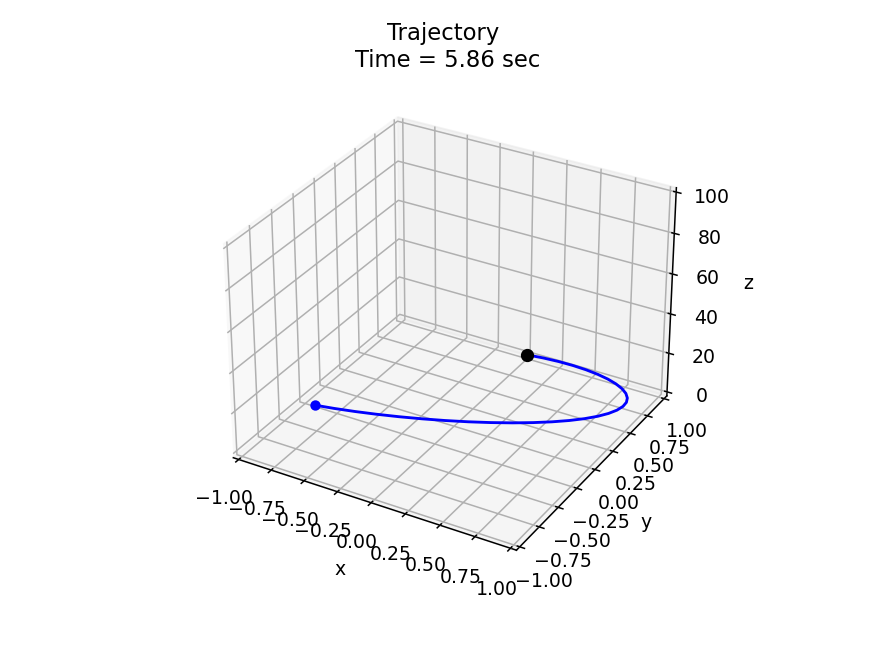

In [19]:
# Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig, animate_func, interval=100,   
                                   frames=n_points)
plt.show()

In [ ]:
# Saving the Animation
f = r"c://Users/(Insert User)/Desktop/animate_func.gif"
writergif = animation.PillowWriter(fps=numDataPoints/6)
line_ani.save(f, writer=writergif)

In [8]:
def polar2cart(r, theta):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    
    return x,y
    

# create some arbitrary data
# define time
t = np.linspace(0, 20, 20)
n_t = len(t)
n_d = 3

# define the angle for a circle
theta = np.linspace(0, 2*np.pi, 100)
n_points = len(theta)

# define a large circle in xy plane
xy_circ = np.zeros((n_t,n_d,n_points))
xy_circ[0,0,:], xy_circ[0,1,:] = polar2cart(2, theta)

# define a smaller circle in yz plane
yz_circ = np.zeros((n_t,3,n_points))
yz_circ[0,1,:], yz_circ[0,2,:] = polar2cart(1, theta)
yz_circ[0,1,:] += 2

# generate random movements for the circle
for i in range(n_t-1):
    rands = np.random.rand(n_points)/10
    xy_circ[i+1,0,:] += xy_circ[i,0,:] + rands
    xy_circ[i+1,1,:] += xy_circ[i,1,:] + rands
    xy_circ[i+1,2,:] += xy_circ[i,2,:] + rands
    
    rands = np.random.rand(n_points)/10
    yz_circ[i+1,0,:] += yz_circ[i,0,:] + rands
    yz_circ[i+1,1,:] += yz_circ[i,1,:] + rands
    yz_circ[i+1,2,:] += yz_circ[i,2,:] + rands

<IPython.core.display.Javascript object>


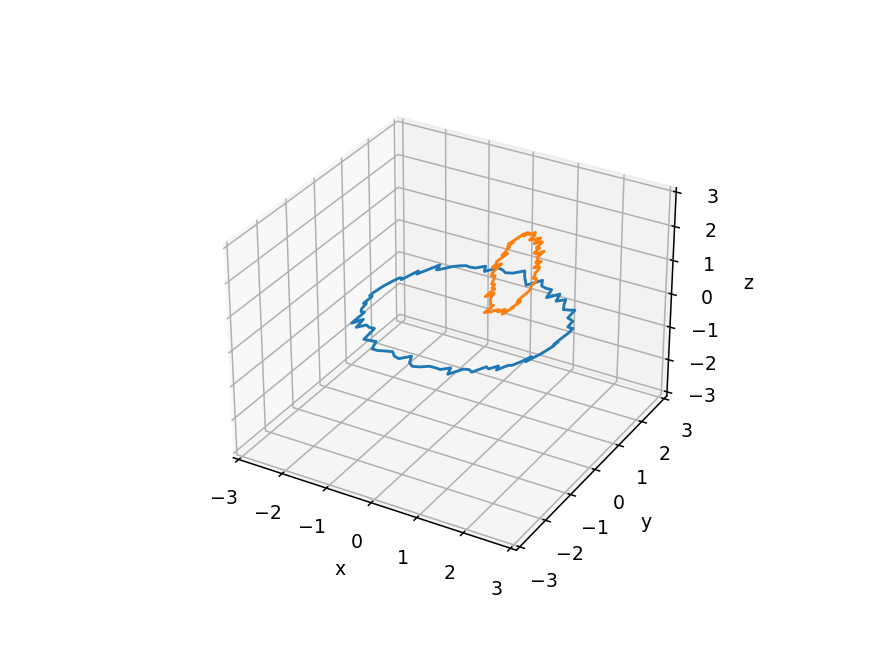

In [63]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xy_circ[3,0,:],xy_circ[3,1,:],xy_circ[3,2,:])
ax.plot3D(yz_circ[3,0,:],yz_circ[3,1,:], yz_circ[3,2,:])
ax.set_xlim3d([-3, 3])
ax.set_ylim3d([-3, 3])
ax.set_zlim3d([-3, 3])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

<IPython.core.display.Javascript object>


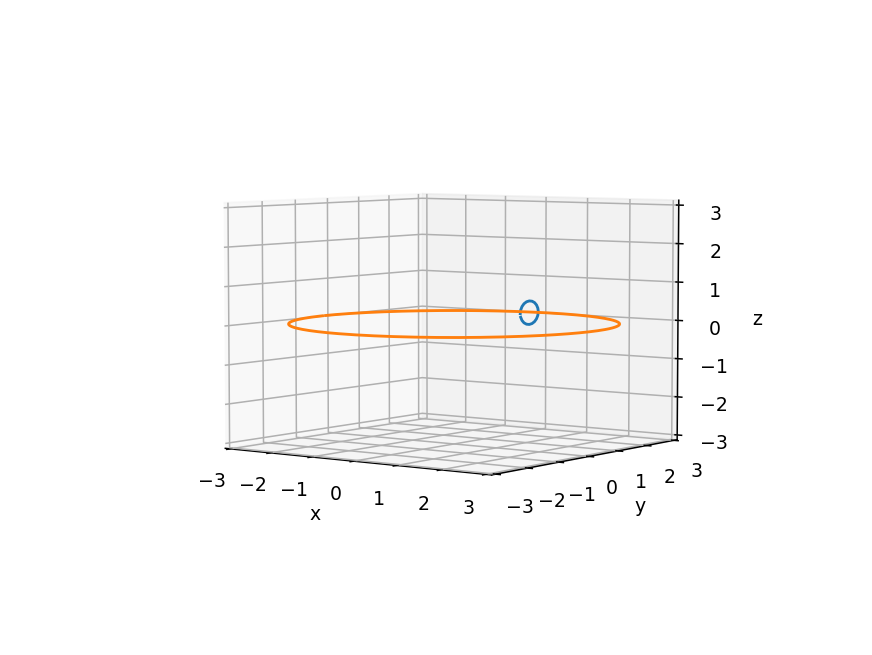

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(smallring[0,0,:],smallring[0,1,:],smallring[0,2,:])
ax.plot3D(largering[0,0,:],largering[0,1,:], largering[0,2,:])
ax.set_xlim3d([-3, 3])
ax.set_ylim3d([-3, 3])
ax.set_zlim3d([-3, 3])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

<IPython.core.display.Javascript object>


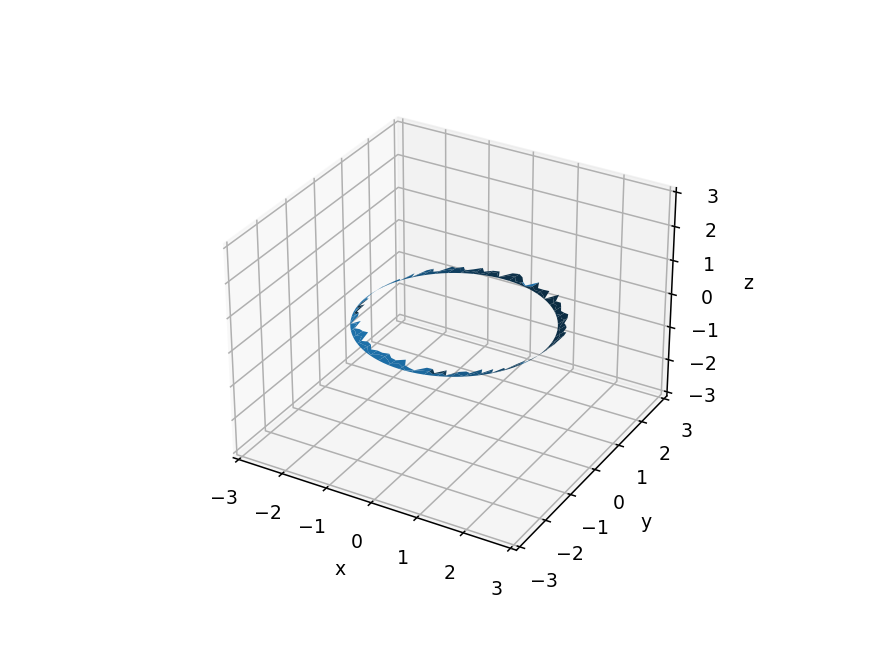

In [64]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xy_circ[:3,0,:], xy_circ[:3,1,:],xy_circ[:3,2,:])
ax.set_xlim3d([-3, 3])
ax.set_ylim3d([-3, 3])
ax.set_zlim3d([-3, 3])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [51]:
xy_circ[:3,0,:].shape

(3, 100)

In [5]:
def reload(totSteps, fname):
#     T = 50, gamma = 1/50, length = 10, dt = 0.1, skipSteps = 1, 
#            f_pdb = "pdb", f_ff = "forcefield", srSize = 20):
#     fname = "{}fs_{}ps_{}K_{}ss.xyz".format(dt, length, T, skipSteps)
#     totSteps = int(length*1000/(skipSteps * dt))
#     print("totSteps", totSteps)

    a = np.loadtxt(fname)
    nParticles = a.shape[-1]//3
    a = a.reshape(totSteps, 3, nParticles)
    print(a.shape)

    return a

In [18]:
data = reload(10000, "animation positions.xyz")

(10000, 3, 220)


In [19]:
smallring = data[:,:,:20]
largering = data[:,:,20:]

In [40]:
#  %%writefile "animate.py"

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import argparse

# need this to display plots in jupyter notebook
# %matplotlib notebook

# setup the argument parser
parser = argparse.ArgumentParser(description='Animate some rings!!!')
parser.add_argument('-d1', '--data1', help='first dataset, np.array(time, axes, particles)')
parser.add_argument('-d2', '--data2', help='second dataset, np.array(time, axes, particles)')
parser.add_argument('-mins', '--minimums', help='plotting display minimums, [x,y,x]')
parser.add_argument('-maxs', '--maximums', help='plotting display maximums, [x,y,x]')
parser.add_argument('-c', '--count', help='number of time steps, int')
parser.add_argument('-n', '--name', help='save file name, string')
parser.add_argument('-di', '--dispinit', help='display initial particles, bool, default=True')
parser.add_argument('-ds', '--dispsurf', help='display surface history, bool, default=True')
parser.add_argument('-dc', '--dispcurr', help='display current particles, bool, default=True')
parser.print_help()

def animate_data(data1, data2, mins, maxs, n_t, name, initials = True, hists = True, curr = True):

    # this is the function used in the FuncAnimation function
    def animate_func(num):

        # clear current figure
        ax.clear()     

        if hists:
            # update the data for the line, use num+1 bc Python indexing
            ax.plot_surface(data1[:num+1,0,:], data1[:num+1,1,:],data1[:num+1,2,:], color='blue')
            ax.plot_surface(data2[:num+1,0,:], data2[:num+1,1,:],data2[:num+1,2,:], color='orange')

        if curr:
            # add a point for the current particle point
            ax.scatter(data1[num,0,:], data1[num,1,:], data1[num,2,:], c='blue', marker='o')
            ax.scatter(data2[num,0,:], data2[num,1,:], data2[num,2,:], c='orange', marker='o')
            ax.plot3D(data1[num,0,:], data1[num,1,:], data1[num,2,:], c='blue')
            ax.plot3D(data2[num,0,:], data2[num,1,:], data2[num,2,:], c='orange')

        if initials:
            # add a point for the particle start point
            ax.plot3D(data1[0,0,:], data1[0,1,:], data1[0,2,:], c='black', marker='o')
            ax.plot3D(data2[0,0,:], data2[0,1,:], data2[0,2,:], c='red', marker='o') 


#         # update the data for the line, use num+1 bc Python indexing
#         ax.plot_surface(data1[:num+1,0,:], data1[:num+1,1,:],data1[:num+1,2,:], color='blue')
#         ax.plot_surface(data2[:num+1,0,:], data2[:num+1,1,:],data2[:num+1,2,:], color='orange')


#         # add a point for the current particle point
#         ax.scatter(data1[num,0,:], data1[num,1,:], data1[num,2,:], c='blue', marker='o')
#         ax.scatter(data2[num,0,:], data2[num,1,:], data2[num,2,:], c='orange', marker='o')


#         # add a point for the particle start point
#         ax.plot3D(data1[0,0,:], data1[0,1,:], data1[0,2,:], c='black', marker='o')
#         ax.plot3D(data2[0,0,:], data2[0,1,:], data2[0,2,:], c='red', marker='o') 
        
#         # Setting Axes Limits
#         ax.set_xlim3d([mins[0], maxs[0]])
#         ax.set_ylim3d([mins[1], maxs[1]])
#         ax.set_zlim3d([mins[2], maxs[2]])

        # Adding Figure Labels
        ax.set_title('Trajectory \nStep = ' + str(num))
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        
    # plotting the animation
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    line_ani = animation.FuncAnimation(fig, animate_func, interval=0.5, frames=n_t-1)
    
    print ("done")
    plt.show()
    
#     # Saving the Animation
#     writergif = animation.PillowWriter(fps=n_t/6)
#     line_ani.save(name, writer=writergif)
    
    return line_ani

if __name__ == "__main__":
#     args=parser.parse_args()
#     print(args)
#     animate_data(args)
    print("main")

usage: ipykernel_launcher.py [-h] [-d1 DATA1] [-d2 DATA2] [-mins MINIMUMS] [-maxs MAXIMUMS] [-c COUNT] [-n NAME]
                             [-di DISPINIT] [-ds DISPSURF] [-dc DISPCURR]

Animate some rings!!!

optional arguments:
  -h, --help            show this help message and exit
  -d1 DATA1, --data1 DATA1
                        first dataset, np.array(time, axes, particles)
  -d2 DATA2, --data2 DATA2
                        second dataset, np.array(time, axes, particles)
  -mins MINIMUMS, --minimums MINIMUMS
                        plotting display minimums, [x,y,x]
  -maxs MAXIMUMS, --maximums MAXIMUMS
                        plotting display maximums, [x,y,x]
  -c COUNT, --count COUNT
                        number of time steps, int
  -n NAME, --name NAME  save file name, string
  -di DISPINIT, --dispinit DISPINIT
                        display initial particles, bool, default=True
  -ds DISPSURF, --dispsurf DISPSURF
                        display surface history, bool, de

<IPython.core.display.Javascript object>


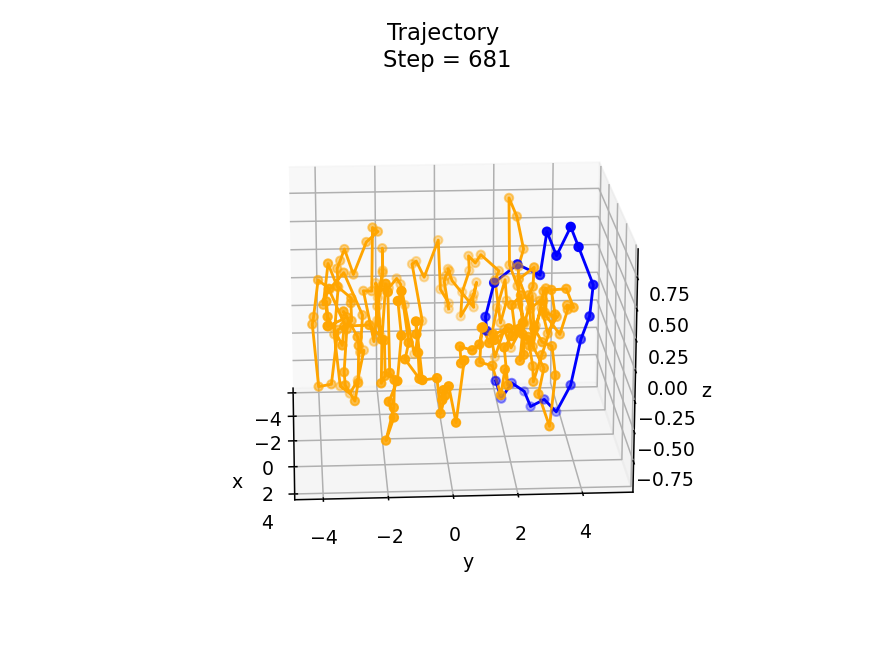

done


In [41]:
animated_data = animate_data(smallring, largering, [-5,-5,-5], [5,5,5], 10000, "test_111.gif", initials = False, hists = False, curr = True)

In [66]:
# Saving the Animation
f = r"animate_func_test.gif"
writergif = animation.PillowWriter(fps=n_t/6)
animated_data.save(f, writer=writergif)